# Linear Regression

The workhorse of empirical research in the social sciences

In [1]:
import matplotlib as mpl
import pandas as pd
import pyrsm as rsm

# increase plot resolution
mpl.rcParams["figure.dpi"] = 150


### Example 1: Catalog sales

We have access to data from a company selling men's and women's apparel through mail-order catalogs (dataset `catalog`). The company maintains a database on past and current customers' value and characteristics. Value is determined as the total \$ sales to the customer in the last year.

The catalog company is interested in redesigning their Customer Relationship Management (CRM) strategy. We will proceed in two steps:

1. Estimate a regression model using last year's sales total. Response variable: sales total for each of the 200 households; Explanatory variables: household income (measured in thousands of dollars), size of household, and age of the household head.
2. Interpret each of the estimated coefficients. Also provide a statistical evaluation of the model as a whole.

In [2]:
rsm.load_data(pkg="model", name="catalog", dct=globals())


In [3]:
rsm.describe(catalog)


## Catalog sales

### Description

Data from a company selling men's and women's apparel through mail-order catalogs. The company maintains a database on past and current customers' value and characteristics. Value is determine as the total $ sales to the customer in the last year. The data are a random sample of 200 customers from the company's database.

### Variables

A data frame with 200 observations on 4 variables

- id = Customer id
- Sales =	Total sales (in $) to a household in the past year
- Income = Household income ($1000) 
- HH.size = Size of the household (# of people) 
- Age = Age of the head of the household

In [4]:
evars = ["Income", "HH_size", "Age"]
rvar = "Sales"


In [5]:
fitted = rsm.regress(catalog, rvar=rvar, evars=evars, ssq=True)


Data:  catalog
Response variable    : Sales
Explanatory variables: Income, HH_size, Age
Null hyp.: the effect of x on Sales is zero
Alt. hyp.: the effect of x on Sales is not zero

                             OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     32.33
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           5.08e-17
Time:                        14:29:14   Log-Likelihood:                -1179.8
No. Observations:                 200   AIC:                             2368.
Df Residuals:                     196   BIC:                             2381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std

In [8]:
fitted = regress(catalog, form="Sales ~ Income + HH_size + Age")


Data:  catalog
Response variable    : Sales
Explanatory variables: Age, HH_size, Income
Null hyp.: the effect of x on Sales is zero
Alt. hyp.: the effect of x on Sales is not zero

                             OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     32.33
Date:                Sun, 15 May 2022   Prob (F-statistic):           5.08e-17
Time:                        15:38:19   Log-Likelihood:                -1179.8
No. Observations:                 200   AIC:                             2368.
Df Residuals:                     196   BIC:                             2381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std

Probability calculator
Distribution: F
Df 1:	3
Df 2:	196
Mean:	1.01
Variance:	0.698
Lower bound:	0
Upper bound:	0.975

P(X < 3.183) = 0.975
P(X > 3.183) = 0.025


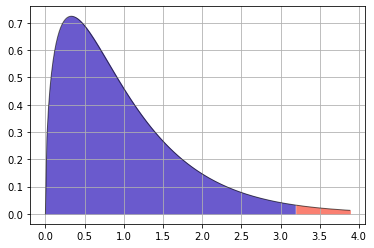

In [7]:
params = dict(zip(["dfn", "dfd", "lb", "ub", "decimals"], [3, 196, 0, 0.975, 3]))
prob_calc_f = rsm.prob_calc("F", params)
prob_calc_f.calculate()
prob_calc_f.plot()


Probability calculator
Distribution: t
Df:	196
Mean:	0.0
St. dev:	1.005
Lower bound:	0.025
Upper bound:	0.975

P(X < -1.972) = 0.025
P(X > -1.972) = 0.975
P(X < 1.972) = 0.975
P(X > 1.972) = 0.025
P(-1.972 < X < 1.972) = 0.95
1 - P(-1.972 < X < 1.972 = 0.05


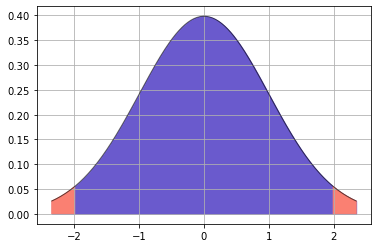

In [8]:
params = dict(zip(["df", "lb", "ub", "decimals"], [196, 0.025, 0.975, 3]))
prob_calc_t = rsm.prob_calc("t", params)
prob_calc_t.calculate()
prob_calc_t.plot()


### Example 2: Ideal data for regression

The data `ideal` contains simulated data that is very useful to demonstrate what data for, and residuals from, a regression should ideally look like. The data has 1,000 observations on 4 variables. `y` is the response variable and `x1`, `x2`, and `x3` are explanatory variables. The plots shown below can be used as a bench mark for regressions on real world data

In [9]:
rsm.load_data(pkg="model", name="ideal", dct=globals())


In [10]:
rsm.describe(ideal)


## 'Ideal' data for regression

### Description

Simulated data set used to illustrate evaluation of regression residuals.  

### Variables

A data frame with 1000 observations on 4 variables (y, x1, x2, and x3)

In [11]:
evars = ["x1", "x2", "x3"]
rvar = "y"


In [19]:
fitted = regress(ideal, evars=evars, rvar=rvar)


Data:  'ideal'
Response variable    : y
Explanatory variables: x1, x2, x3
Null hyp.: the effect of x on y is zero
Alt. hyp.: the effect of x on y is not zero

                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1361.
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        15:39:10   Log-Likelihood:                -2100.2
No. Observations:                1000   AIC:                             4208.
Df Residuals:                     996   BIC:                             4228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

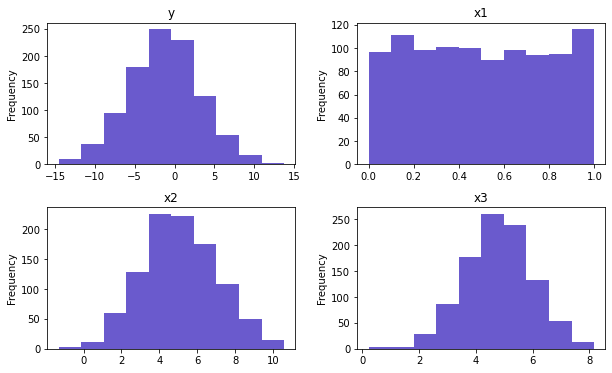

In [12]:
rsm.distr_plot(ideal)


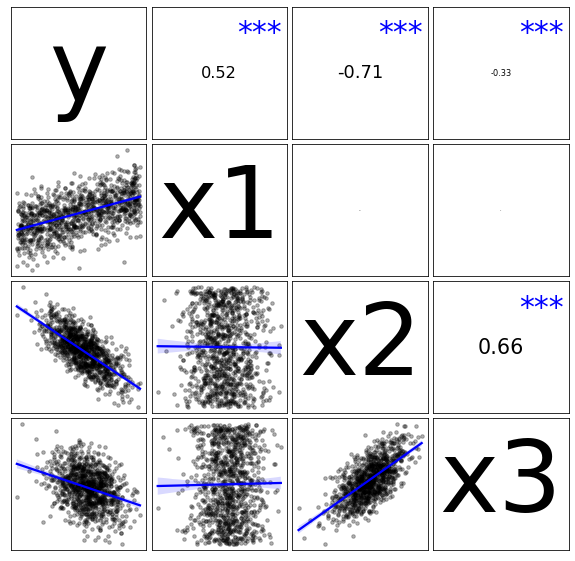

In [25]:
cr = rsm.correlation(ideal[["y", "x1", "x2", "x3"]])
cr.plot(nobs=-1, figsize=(10, 10))


In [13]:
rsm.scatter_plot(fitted)


AttributeError: module 'pyrsm' has no attribute 'scatter_plot'

AttributeError: module 'statsmodels.formula.api' has no attribute 'qqplot'

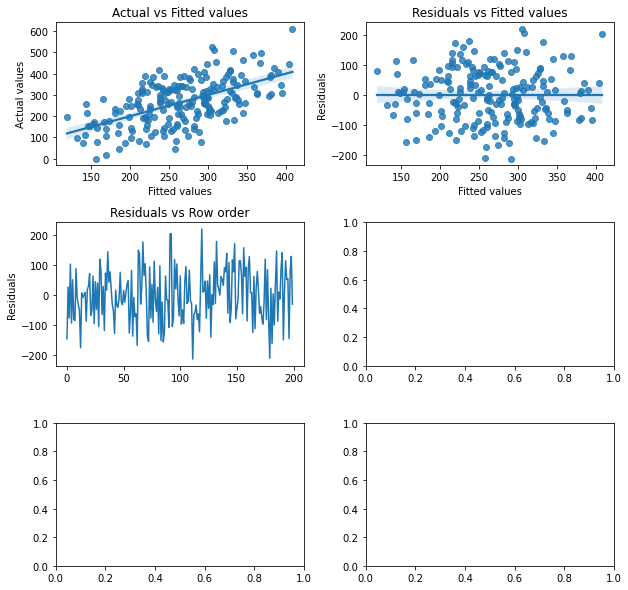

In [14]:
rsm.reg_dashboard(fitted=fitted, nobs=-1)
